In [2]:

%env GISBASE=`grass79 --config path`   # or define path to binaries like /usr/local/grass-7.8.dev
!echo $GISBASE

# generate GISRC
# Defines the system wide value while in a GRASS session
%env MYGISDBASE=$HOME/Documents/grassdata # Change this path to reflect your own 
%env MYLOC=wrri_nad83_6542 # Change this location name to reflect your own 
%env MYMAPSET=tomorrownow

# Set the global grassrc file to individual file name
%env MYGISRC="$HOME/.grassrc.$$"

!echo "GISDBASE: $MYGISDBASE" > "$MYGISRC"
!echo "LOCATION_NAME: $MYLOC" >> "$MYGISRC"
!echo "MAPSET: $MYMAPSET" >> "$MYGISRC"
!echo "GRASS_GUI: text" >> "$MYGISRC"

# path to GRASS settings file
%env GISRC=$MYGISRC

%env LD_LIBRARY_PATH=$GISBASE/lib:$LD_LIBRARY_PATH
%env PYTHONPATH=$GISBASE/etc/python:$PYTHONPATH
%env PATH=$GISBASE/bin:$GISBASE/scripts:$PATH



env: GISBASE=`grass79 --config path`   # or define path to binaries like /usr/local/grass-7.8.dev
`grass79 --config path` # or define path to binaries like /usr/local/grass-7.8.dev
env: MYGISDBASE=$HOME/Documents/grassdata # Change this path to reflect your own
env: MYLOC=wrri_nad83_6542 # Change this location name to reflect your own
env: MYMAPSET=tomorrownow
env: MYGISRC="$HOME/.grassrc.$$"
/bin/bash: "$HOME/.grassrc.$$": No such file or directory
/bin/bash: "$HOME/.grassrc.$$": No such file or directory
/bin/bash: "$HOME/.grassrc.$$": No such file or directory
/bin/bash: "$HOME/.grassrc.$$": No such file or directory
env: GISRC=$MYGISRC
env: LD_LIBRARY_PATH=$GISBASE/lib:$LD_LIBRARY_PATH
env: PYTHONPATH=$GISBASE/etc/python:$PYTHONPATH
env: PATH=$GISBASE/bin:$GISBASE/scripts:$PATH


In [3]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
gisbase = '/usr/local/grass79' #subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.script.setup as gsetup

# Create a GRASS GIS session.
rcfile = gsetup.init(gisbase, "/home/coreywhite/Documents/grassdata", "wrri_nad83_6542", "tomorrownow")

# We want functions to raise exceptions and see standard output of the modules in the notebook.
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# Simply overwrite existing maps like we overwrite Python variable values.
os.environ['GRASS_OVERWRITE'] = '1'
# Enable map rendering in a notebook.
os.environ['GRASS_FONT'] = 'sans'
# Set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

In [63]:
survey ="surveyPoint@PERMANENT"
w2_survey_results = "w2_survey_results"

# QL2 DEM
dem = "dem_10m_mosaic@wrri10m"
hillshade = "dem_10m_hillshade@wrri10m"

# Political Boundaries
nc_state = "nc_state@PERMANENT"
research_triangle = "ResearchTriangle@PERMANENT"
research_triangle_core = "ResearchTriangleCore@PERMANENT"

# Hydrological Boundaries
huc_12 = "wbd_huc_10_12@PERMANENT"

#Land Cover
lcmap_2017 = "LCMAP_CU_2017_V01_LCPRI@PERMANENT"
nlcd_2016 = ""


In [53]:
gs.parse_command('g.region', vector=research_triangle, res=10, flags='pg')


{'projection': '99',
 'zone': '0',
 'n': '310235.5555',
 's': '167250.0967',
 'w': '559202.8574',
 'e': '698392.8363',
 'nsres': '9.99968241',
 'ewres': '9.99999848',
 'rows': '14299',
 'cols': '13919',
 'cells': '199027781'}

In [33]:
# Create layer of subwatersheds that interest the Triangle
research_triangle_huc12 = "research_triangle_huc12"
gs.run_command("v.select", overwrite=True, ainput=huc_12, binput=research_triangle, output=research_triangle_huc12, operator="overlap")


In [59]:
gs.parse_command('g.region', vector=research_triangle_huc12, res=10, flags='pg')
gs.parse_command("v.info", map=research_triangle_huc12)

{'+----------------------------------------------------------------------------+': None,
 '| Name:            research_triangle_huc12                                   |': None,
 '| Mapset:          tomorrownow                                               |': None,
 '| Location:        wrri_nad83_6542                                           |': None,
 '| Database:        /home/coreywhite/Documents/grassdata                      |': None,
 '| Title:                                                                     |': None,
 '| Map scale:       1:1                                                       |': None,
 '| Name of creator: coreywhite                                                |': None,
 '| Organization:                                                              |': None,
 '| Source date:     Mon Apr  5 12:37:38 2021                                  |': None,
 '| Timestamp (first layer): none                                              |': None,
 '|------------------

In [71]:
# Mask 
gs.run_command("r.mask", flags="r")
gs.run_command("r.mask", vector=research_triangle_huc12)

/usr/bin/env: ‘python3’: No such file or directory


CalledModuleError: Module run r.mask r.mask -r ended with error
Process ended with non-zero return code 127. See errors in the (error) output.

In [72]:
# Filter survey results to the day of Workshop 2
gs.run_command("v.extract", overwrite=True, input=survey, where="CreationDa = '2019-04-12'", output=w2_survey_results)
gs.parse_command("v.info", map=w2_survey_results)
gs.parse_command("v.info", map=w2_survey_results, flags="c")

{'INTEGER|cat': None,
 'CHARACTER|globalid': None,
 'DATE|CreationDa': None,
 'CHARACTER|Creator': None,
 'DATE|EditDate': None,
 'CHARACTER|Editor': None,
 'CHARACTER|why_is_thi': None,
 'CHARACTER|when_will_': None,
 'CHARACTER|how_seriou': None,
 'CHARACTER|what_is_th': None,
 'CHARACTER|what_actio': None,
 'CHARACTER|what_type_': None,
 'CHARACTER|what_type1': None,
 'CHARACTER|what_typ_1': None,
 'CHARACTER|are_you_a_': None,
 'CHARACTER|field_19': None,
 'CHARACTER|how_challe': None,
 'CHARACTER|field_21': None,
 'CHARACTER|field_22': None,
 'CHARACTER|what_would': None,
 'CHARACTER|field_19_o': None,
 'CHARACTER|how_often': None,
 'CHARACTER|how_long': None,
 'CHARACTER|how_seri_1': None}

In [50]:
gs.parse_command("v.vect.stats", points=w2_survey_results,  areas=research_triangle_huc12, flags="p")

{'area_cat|count': None,
 '16|0': None,
 '45|0': None,
 '59|0': None,
 '91|0': None,
 '92|0': None,
 '95|0': None,
 '102|0': None,
 '114|0': None,
 '123|0': None,
 '191|0': None,
 '197|0': None,
 '199|0': None,
 '205|0': None,
 '225|0': None,
 '237|0': None,
 '245|0': None,
 '252|0': None,
 '258|0': None,
 '266|0': None,
 '271|0': None,
 '278|0': None,
 '282|0': None,
 '284|0': None,
 '294|0': None,
 '303|0': None,
 '323|0': None,
 '331|0': None,
 '348|0': None,
 '356|0': None,
 '364|0': None,
 '375|0': None,
 '384|0': None,
 '388|0': None,
 '397|0': None,
 '415|0': None,
 '424|0': None,
 '425|0': None,
 '446|0': None,
 '447|0': None,
 '451|0': None,
 '458|0': None,
 '467|0': None,
 '468|0': None,
 '473|0': None,
 '475|0': None,
 '481|0': None,
 '495|0': None,
 '516|0': None,
 '519|0': None,
 '523|3': None,
 '529|0': None,
 '534|0': None,
 '549|0': None,
 '550|1': None,
 '552|0': None,
 '567|0': None,
 '576|0': None,
 '579|0': None,
 '595|0': None,
 '601|0': None,
 '602|0': None,
 '613

In [106]:
# Indetify clusters from the survey using the density algorithm 
w2_survey_clusters = "w2_survey_clusters"
gs.run_command("v.cluster", overwrite=True, verbose=True, input=w2_survey_results, output=w2_survey_clusters, layer=2, distance=1000, min=3, method="dbscan")

In [105]:
gs.parse_command("v.info", map="survey_clusters@tomorrownow", flags="h")

{'COMMAND: v.in.ogr input': '"/home/coreywhite/Downloads/ArcGIS_Survey123_Results" layer="surveyPoint" output="surveyPoint" min_area=0.0001 type="" snap=-1',
 'GISDBASE: /home/coreywhite/Documents/grassdata': None,
 'LOCATION: tmp_v_import_location_tomorrownow_7703 MAPSET: PERMANENT USER: coreywhite DATE: Fri Feb  5 16:04:20 2021': None,
 '---------------------------------------------------------------------------------': None,
 'COMMAND: v.proj location': '"tmp_v_import_location_tomorrownow_7703" mapset="PERMANENT" input="surveyPoint" smax=10000',
 'LOCATION: wrri_nad83_6542 MAPSET: tomorrownow USER: coreywhite DATE: Fri Feb  5 16:04:20 2021': None,
 'COMMAND: v.cluster --overwrite input': '"surveyPoint@tomorrownow" output="survey_clusters@tomorrownow" layer="2" distance=1000 min=3 method="dbscan"',
 'LOCATION: wrri_nad83_6542 MAPSET: tomorrownow USER: coreywhite DATE: Fri Feb 19 15:38:27 2021': None}

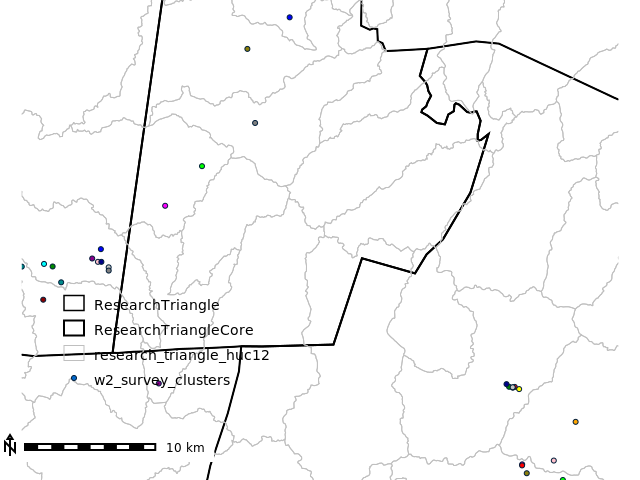

In [117]:
gs.parse_command('g.region', vector=w2_survey_clusters, res=10, flags='pg')
gs.run_command('d.erase')
gs.run_command('d.vect', map=research_triangle, color="000:000:000", fill_color="none", width=1.5)
gs.run_command('d.vect', map=research_triangle_core, color="000:000:000", fill_color="none", width=2)
gs.run_command('d.vect', map=research_triangle_huc12, color="191:191:191:255", fill_color="none")
gs.run_command('d.vect', map=w2_survey_clusters, icon="basic/point", size=10, flags="c")
gs.run_command('d.barscale', flags='n')
gs.run_command('d.legend.vect')
Image(filename="map.png")